In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"D:\ml lab data set\diabites data set for cla\Naive-Bayes-Classification-Data.csv")

In [3]:
data.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [4]:
x=data.drop(columns='diabetes')
y=data['diabetes']

In [5]:
from sklearn.model_selection import train_test_split as tt
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.tree import DecisionTreeRegressor as dr
from sklearn.ensemble import StackingClassifier as sc
from sklearn import metrics as m

In [6]:
t_r,t_t,y_t,y_t=tt(x,y,test_size=0.2,random_state=2)

In [7]:
base_mod=[('nb',nb()),
          ('dr',dr(random_state=42))
         ]

In [8]:
from sklearn.linear_model import LogisticRegression as lg

In [9]:
met=lg()

In [10]:
stack=sc(estimators=base_mod,final_estimator=met)
stack.fit(t_t,y_t)

StackingClassifier(estimators=[('nb', GaussianNB()),
                               ('dr', DecisionTreeRegressor(random_state=42))],
                   final_estimator=LogisticRegression())

In [11]:
y_pr=stack.predict(t_t)

In [12]:
score=stack.score(t_t,y_t)

In [13]:
print(score)

0.949748743718593


In [14]:
prs=m.precision_score(y_t,y_pr)
acc=m.accuracy_score(y_t,y_pr)
re=m.recall_score(y_t,y_pr)
cm=m.confusion_matrix(y_t,y_pr)
roc=m.roc_auc_score(y_t,y_pr)


In [19]:
print(f'precision_score: {prs}\naccuracy_score: {acc}\nrecall_score: {re}\nroc_auc_score: {roc}')
print(cm)

precision_score: 0.9666666666666667
accuracy_score: 0.949748743718593
recall_score: 0.925531914893617
roc_auc_score: 0.9484802431610942
[[102   3]
 [  7  87]]


In [15]:
import seaborn as ss

<Axes: >

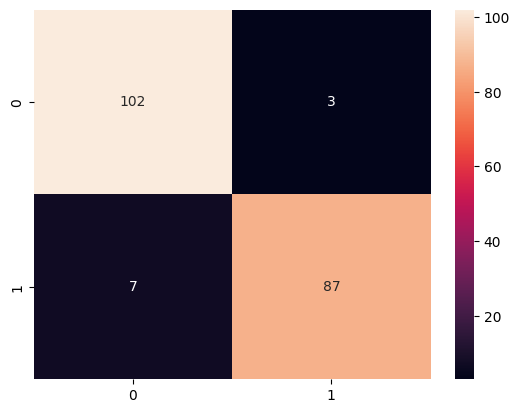

In [18]:
ss.heatmap(cm,annot=True,fmt='d')